# LlamaIndex
## [Youtube Video covering this notebook](https://youtu.be/QNKeNiRjtGQ?si=UFH9WL5nXvmj2EM1)
- [LlamaIndex Website](https://www.llamaindex.ai/)
- [LangChain Website](https://python.langchain.com/docs/get_started/introduction)
-[Retrieval-Augmented Generation (RAG)](https://research.ibm.com/blog/retrieval-augmented-generation-RAG)


## Install libraries and Env Setup

In [1]:
%%capture
!pip install llama-index openai

In [2]:
import os
# https://platform.openai.com/account/api-keys
os.environ["OPENAI_API_KEY"] = "YOUR_OPENAI_API_KEY"

## Implementation

In [3]:
# Import necessary packages
from llama_index.llms.openai import OpenAI
from llama_index.core import VectorStoreIndex,SimpleDirectoryReader
from IPython.display import Markdown, display

In [4]:
#VectorStoreIndex??
#SimpleDirectoryReader??

In [5]:
import os
import subprocess

# Specify the URL of the PDF file you want to download
pdf_url = "https://browse.arxiv.org/pdf/1706.03762.pdf"

# Specify the directory where you want to save the PDF file
download_dir = "data"

# Specify the desired new name for the downloaded PDF file
new_filename = "attention-is-all-you-need.pdf"

# Create the directory if it doesn't exist
if not os.path.exists(download_dir):
    os.makedirs(download_dir)

# Use wget to download the PDF file into the directory
command = f"wget -P {download_dir} {pdf_url}"

# Execute the wget command using subprocess
try:
    subprocess.run(command, shell=True, check=True)
    print(f"PDF downloaded successfully to {download_dir}")

    # Rename the downloaded file to the desired name
    old_filepath = os.path.join(download_dir, os.path.basename(pdf_url))
    new_filepath = os.path.join(download_dir, new_filename)
    os.rename(old_filepath, new_filepath)
    print(f"PDF renamed to {new_filename}")
except subprocess.CalledProcessError as e:
    print(f"Error: {e}")

PDF downloaded successfully to data
PDF renamed to attention-is-all-you-need.pdf


In [6]:
%%capture
!pip install pypdf

## Load documents and build index

In [7]:
#document loader
documents = SimpleDirectoryReader("data").load_data()

In [8]:
len(documents)

15

In [9]:
documents[0]

Document(id_='c3b200c2-1d14-446a-b80b-04ec9d839cb3', embedding=None, metadata={'page_label': '1', 'file_name': 'attention-is-all-you-need.pdf', 'file_path': '/content/data/attention-is-all-you-need.pdf', 'file_type': 'application/pdf', 'file_size': 2215244, 'creation_date': '2024-04-17', 'last_modified_date': '2024-04-12'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text='Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.comNoam Shazeer∗\nGoogle Brain\nnoam@google.comNiki Parmar∗\nGoogle Research\nnikip@google.comJakob Uszkoreit∗\nGoogle Research\nusz@google

[LlamaIndex Vector Store Index](https://gpt-index.readthedocs.io/en/latest/core_modules/data_modules/index/vector_store_guide.html)

In [10]:
# build index/vectorstore (document splitting, embedding, storing embeddings + chunks)
index = VectorStoreIndex.from_documents(documents)

### Query
Start querying by getting the default query engine

In [11]:
query_engine = index.as_query_engine() #no history preserved

In [12]:
response = query_engine.query("What is the paper about ?")

In [13]:
response

Response(response='The paper is about analyzing attention mechanisms in neural networks, specifically focusing on the behavior of attention heads in an encoder self-attention model.', source_nodes=[NodeWithScore(node=TextNode(id_='e865fed4-f1a2-4f0e-af52-0c5bbb4329d2', embedding=None, metadata={'page_label': '14', 'file_name': 'attention-is-all-you-need.pdf', 'file_path': '/content/data/attention-is-all-you-need.pdf', 'file_type': 'application/pdf', 'file_size': 2215244, 'creation_date': '2024-04-17', 'last_modified_date': '2024-04-12'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='0ac37785-62f7-4485-b148-d3e797949e23', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'page_label': '14', 'file_name': 'att

In [14]:
display(Markdown(f"<b>{response}</b>"))

<b>The paper is about analyzing attention mechanisms in neural networks, specifically focusing on the behavior of attention heads in an encoder self-attention model.</b>

### Storing and Loading the Index

In [15]:
index.storage_context.persist()

In [16]:
from llama_index.core import StorageContext, load_index_from_storage

storage_context = StorageContext.from_defaults(persist_dir="./storage")
index = load_index_from_storage(storage_context=storage_context)

## We used the default one,  How to Customize It ??
[Customizing LLms within LlamaIndex](https://gpt-index.readthedocs.io/en/latest/core_modules/model_modules/llms/usage_custom.html)

In [17]:
from llama_index.core import ServiceContext, set_global_service_context
from llama_index.llms.openai import OpenAI
# alternatively
# from langchain.llms import ...

In [18]:
#define LLM
llm = OpenAI(temperature=0.1, model="gpt-3.5-turbo", max_tokens=512)

# configure service context
service_context = ServiceContext.from_defaults(llm=llm, chunk_size=500, chunk_overlap=50)

# set_global_service_context(service_context)
index = VectorStoreIndex.from_documents(documents, service_context=service_context)

<ipython-input-18-4c9133ed2226>:5: DeprecationWarning: Call to deprecated class method from_defaults. (ServiceContext is deprecated, please use `llama_index.settings.Settings` instead.) -- Deprecated since version 0.10.0.
  service_context = ServiceContext.from_defaults(llm=llm, chunk_size=500, chunk_overlap=50)


In [19]:
query_engine = index.as_query_engine(streaming=True)
response = query_engine.query("What is the paper about ?")
response.print_response_stream()

The paper is about a study on attention mechanisms in neural networks, specifically focusing on the behavior and performance of attention heads in an encoder self-attention model.

## Using LLM From HuggingFace [LINK](https://gpt-index.readthedocs.io/en/latest/core_modules/model_modules/llms/usage_custom.html#example-using-a-huggingface-llm)

In [20]:
!pip install llama-index-embeddings-huggingface
!pip install llama-index-llms-huggingface

In [21]:
from llama_index.llms.huggingface import HuggingFaceLLM
from llama_index.core import PromptTemplate

system_prompt = """<|SYSTEM|># StableLM Tuned (Alpha version)
- StableLM is a helpful and harmless open-source AI language model developed by StabilityAI.
- StableLM is excited to be able to help the user, but will refuse to do anything that could be considered harmful to the user.
- StableLM is more than just an information source, StableLM is also able to write poetry, short stories, and make jokes.
- StableLM will refuse to participate in anything that could harm a human.
"""

# This will wrap the default prompts that are internal to llama-index
query_wrapper_prompt = PromptTemplate("<|USER|>{query_str}<|ASSISTANT|>")

import torch
from llama_index.llms.huggingface import HuggingFaceLLM
llm = HuggingFaceLLM(
    context_window=4096,
    max_new_tokens=256,
    generate_kwargs={"temperature": 0.7, "do_sample": False},
    system_prompt=system_prompt,
    query_wrapper_prompt=query_wrapper_prompt,
    tokenizer_name="StabilityAI/stablelm-tuned-alpha-3b",
    model_name="StabilityAI/stablelm-tuned-alpha-3b",
    device_map="auto",
    stopping_ids=[50278, 50279, 50277, 1, 0],
    tokenizer_kwargs={"max_length": 4096},
    # uncomment this if using CUDA to reduce memory usage
    # model_kwargs={"torch_dtype": torch.float16}
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [22]:
%%capture
!pip install transformers[torch]

In [23]:
import torch
from llama_index.llms.huggingface import HuggingFaceLLM ##########################################################################################################################
from llama_index.core import PromptTemplate

system_prompt = """<|SYSTEM|># StableLM Tuned (Alpha version)
- StableLM is a helpful and harmless open-source AI language model developed by StabilityAI.
- StableLM is excited to be able to help the user, but will refuse to do anything that could be considered harmful to the user.
- StableLM is more than just an information source, StableLM is also able to write poetry, short stories, and make jokes.
- StableLM will refuse to participate in anything that could harm a human.
"""

# This will wrap the default prompts that are internal to llama-index
query_wrapper_prompt = PromptTemplate("<|USER|>{query_str}<|ASSISTANT|>")

llm = HuggingFaceLLM(
    context_window=4096,
    max_new_tokens=256,
    generate_kwargs={"temperature": 0.7, "do_sample": False},
    system_prompt=system_prompt,
    query_wrapper_prompt=query_wrapper_prompt,
    tokenizer_name="StabilityAI/stablelm-tuned-alpha-3b",
    model_name="StabilityAI/stablelm-tuned-alpha-3b",
    device_map="auto",
    stopping_ids=[50278, 50279, 50277, 1, 0],
    tokenizer_kwargs={"max_length": 4096},
    # uncomment this if using CUDA to reduce memory usage
    # model_kwargs={"torch_dtype": torch.float16}
)

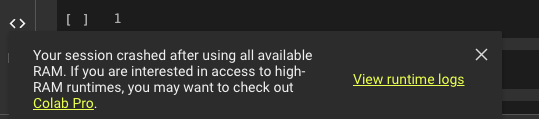

In [24]:
# configure service context
service_context = ServiceContext.from_defaults(
    chunk_size=1024,
    llm=llm,
    #embed_model="local"
)

<ipython-input-24-96ffecc6d483>:2: DeprecationWarning: Call to deprecated class method from_defaults. (ServiceContext is deprecated, please use `llama_index.settings.Settings` instead.) -- Deprecated since version 0.10.0.
  service_context = ServiceContext.from_defaults(


In [25]:
index = VectorStoreIndex.from_documents(documents, service_context=service_context)